In [ ]:
 pip install qiskit

In [ ]:
pip install qiskit_nature

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.operators import FermionicOp
from qiskit.algorithms.time_evolvers import TimeEvolutionProblem, TrotterQRTE
from qiskit.quantum_info import Statevector
from qiskit.primitives import Estimator
from qiskit.synthesis import SuzukiTrotter


### MAIN HUBBARD MODEL SIMULATON FUNCTION CALL ###
# @param: num_sites (int) number of sites on lattice
# @param: t (int) hopping energy
# @param: u (int) coulomb repulsion
# @param: v (int) chemical potential (ignoring this, set constant)
# @param: steps (int) number of Trotterization steps
# @param: initial_conditions (statevector)
# @param: perturbation (FermionicOp) optional
def HubbardModel(num_sites, t, u, v, time, steps, initial_conditions, perturbation = None):
  # Create a Line Lattice with n sites
  line_lattice = LineLattice(num_nodes=num_sites, boundary_condition=BoundaryCondition.OPEN)

  # Create the Fermi-Hubbard model based on this line lattice
  fermi_hubbard_model = FermiHubbardModel(
      line_lattice.uniform_parameters(
          uniform_interaction= t,
          uniform_onsite_potential=v,
      ),
      onsite_interaction= u,
  )

  # Transform Hamiltonian of the Fermi-Hubbard model to FermionicOp
  second_q_op = fermi_hubbard_model.second_q_op()

  # Optional perturbation
  hamiltonian = second_q_op
  if perturbation is not None:
    hamiltonian = second_q_op + perturbation

  # Use the Jordan-Wigner transformation to map to qubit operators
  mapper = JordanWignerMapper()
  qubit_hamiltonian = mapper.map(hamiltonian) # final sparse gate hamiltonian

  # Define Time Evolution Operator
  evolution_problem = TimeEvolutionProblem(hamiltonian = qubit_hamiltonian, initial_state = initial_condition, time = time, aux_operators=[qubit_hamiltonian])

  # Do trotterization
  suz = SuzukiTrotter(order=3)
  trotter = TrotterQRTE(num_timesteps = steps, product_formula=suz, estimator=Estimator())
  result = trotter.evolve(evolution_problem)

  return result


In [ ]:

def print_results(result, description = "Energy vs. Time"):
  # PROCESS RESULTS
  circuit = result.evolved_state
  sv = Statevector(circuit)
  observables = result.observables

  # PROBABILITIES
  for key,val in sv.probabilities_dict().items():
    val = round(val, 1)
    print("state:", key, "=>", val)

  # ENERGY OF SYSTEM
  energy = []
  for observable in observables:
    energy.append(observable[0][0])

  # PLOT THE ENERGIES
  time = np.linspace(0,steps,steps+1)
  plt.plot(time, energy)
  plt.ylim(0,50)
  plt.title(description)
  plt.ylabel('Energy')
  plt.xlabel('Time')

**Below we plot graphs for a series of U and t values**

<ipython-input-52-4f831bc77252>:47: DeprecationWarning: Setting `order` to an odd number in the constructor of SuzukiTrotter is deprecated as of qiskit-terra 0.20.0. It will be removed no earlier than 3 months after the release date. Suzuki product formulae are symmetric and therefore only defined for even orders.
  suz = SuzukiTrotter(order=3)


state: 0000 => 0.0
state: 0001 => 0.0
state: 0010 => 0.0
state: 0011 => 0.1
state: 0100 => 0.0
state: 0101 => 0.0
state: 0110 => 0.2
state: 0111 => 0.0
state: 1000 => 0.0
state: 1001 => 0.2
state: 1010 => 0.0
state: 1011 => 0.0
state: 1100 => 0.6
state: 1101 => 0.0
state: 1110 => 0.0
state: 1111 => 0.0
20.0


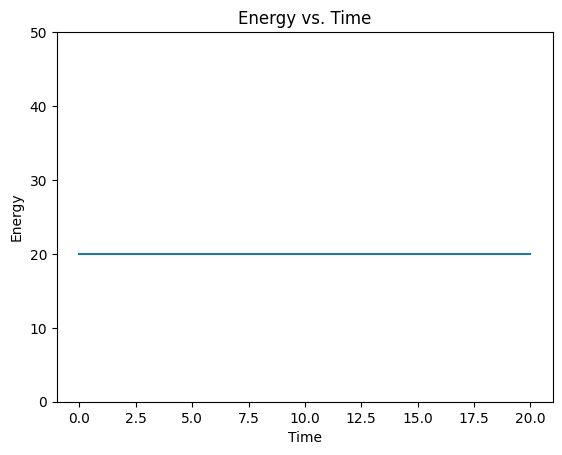

In [ ]:
# DEFINE PARAMETERS
num_sites = 2
t = 1.0
u = 0
v = 10
time = 5
steps = 20
initial_condition = Statevector.from_label("1100")

# MAIN CALL
result2 = HubbardModel(2, t, u, v, time, steps, initial_condition)
print_results(result2, "const t = 1, u = 0")

<ipython-input-52-4f831bc77252>:47: DeprecationWarning: Setting `order` to an odd number in the constructor of SuzukiTrotter is deprecated as of qiskit-terra 0.20.0. It will be removed no earlier than 3 months after the release date. Suzuki product formulae are symmetric and therefore only defined for even orders.
  suz = SuzukiTrotter(order=3)


state: 0000 => 0.0
state: 0001 => 0.0
state: 0010 => 0.0
state: 0011 => 0.6
state: 0100 => 0.0
state: 0101 => 0.0
state: 0110 => 0.1
state: 0111 => 0.0
state: 1000 => 0.0
state: 1001 => 0.1
state: 1010 => 0.0
state: 1011 => 0.0
state: 1100 => 0.1
state: 1101 => 0.0
state: 1110 => 0.0
state: 1111 => 0.0
21.0


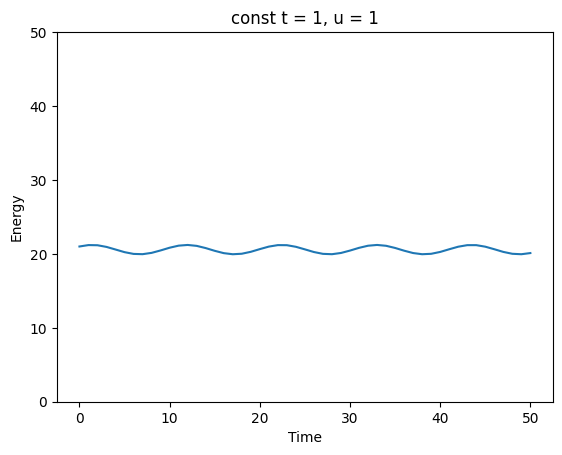

In [ ]:
# DEFINE PARAMETERS
num_sites = 2
t = 1.0
u = 1
v = 10
time = 20
steps = 50
initial_condition = Statevector.from_label("1100")

# MAIN CALL
result2 = HubbardModel(2, t, u, v, time, steps, initial_condition)
print_results(result2, "const t = 1, u = 1")

<ipython-input-44-dd3d2752ff1a>:50: DeprecationWarning: Setting `order` to an odd number in the constructor of SuzukiTrotter is deprecated as of qiskit-terra 0.20.0. It will be removed no earlier than 3 months after the release date. Suzuki product formulae are symmetric and therefore only defined for even orders.
  suz = SuzukiTrotter(order=3)


state: 0000 => 0.0
state: 0001 => 0.0
state: 0010 => 0.0
state: 0011 => 0.2
state: 0100 => 0.0
state: 0101 => 0.0
state: 0110 => 0.2
state: 0111 => 0.0
state: 1000 => 0.0
state: 1001 => 0.2
state: 1010 => 0.0
state: 1011 => 0.0
state: 1100 => 0.4
state: 1101 => 0.0
state: 1110 => 0.0
state: 1111 => 0.0
30.0


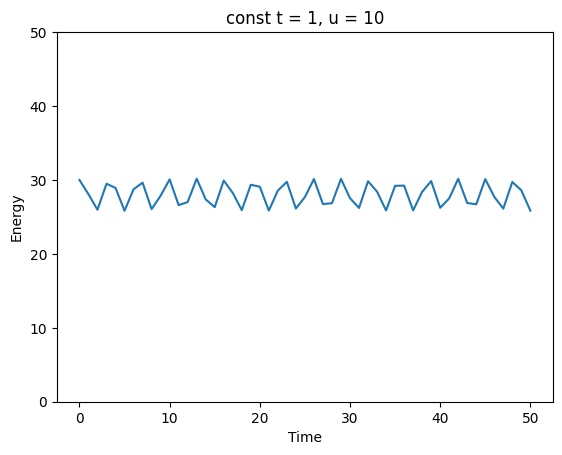

In [ ]:
# DEFINE PARAMETERS
num_sites = 2
t = 1.0
u = 10
v = 10
time = 20
steps = 50
initial_condition = Statevector.from_label("1100")

# MAIN CALL
result2 = HubbardModel(2, t, u, v, time, steps, initial_condition)
print_results(result2, "const t = 1, u = 10")

<ipython-input-189-00612115a3a9>:68: DeprecationWarning: Setting `order` to an odd number in the constructor of SuzukiTrotter is deprecated as of qiskit-terra 0.20.0. It will be removed no earlier than 3 months after the release date. Suzuki product formulae are symmetric and therefore only defined for even orders.
  suz = SuzukiTrotter(order=3)


state: 0000 => 0.0
state: 0100 => 0.0
state: 1000 => 0.0
state: 1100 => 1.0
21.0


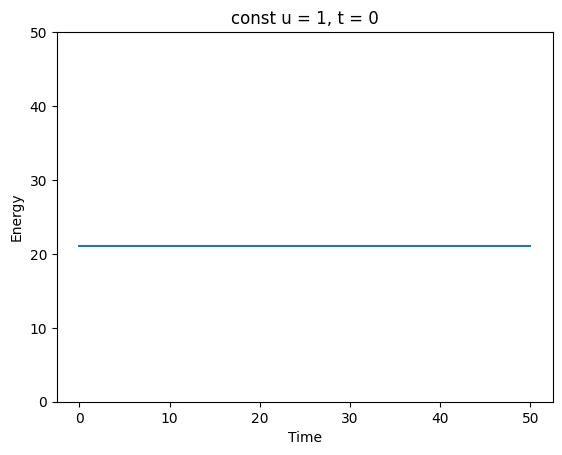

In [ ]:
# DEFINE PARAMETERS
num_sites = 2
t = 0
u = 1
v = 10
time = 20
steps = 50
initial_condition = Statevector.from_label("1100")

# MAIN CALL
result2 = HubbardModel(2, t, u, v, time, steps, initial_condition)
print_results(result2, "const u = 1, t = 0")

<ipython-input-189-00612115a3a9>:68: DeprecationWarning: Setting `order` to an odd number in the constructor of SuzukiTrotter is deprecated as of qiskit-terra 0.20.0. It will be removed no earlier than 3 months after the release date. Suzuki product formulae are symmetric and therefore only defined for even orders.
  suz = SuzukiTrotter(order=3)


state: 0000 => 0.0
state: 0001 => 0.0
state: 0010 => 0.0
state: 0011 => 0.6
state: 0100 => 0.0
state: 0101 => 0.0
state: 0110 => 0.1
state: 0111 => 0.0
state: 1000 => 0.0
state: 1001 => 0.1
state: 1010 => 0.0
state: 1011 => 0.0
state: 1100 => 0.1
state: 1101 => 0.0
state: 1110 => 0.0
state: 1111 => 0.0
21.0


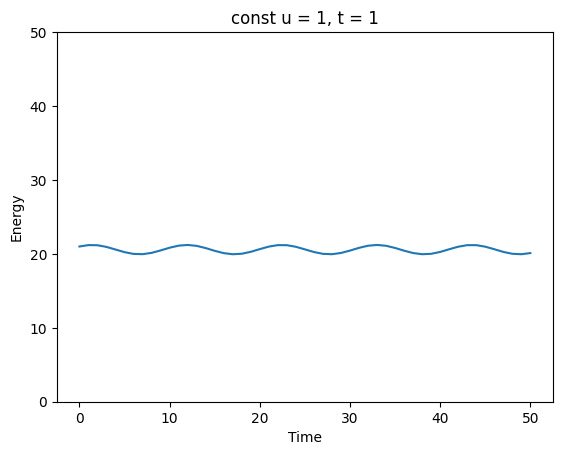

In [ ]:
# DEFINE PARAMETERS
num_sites = 2
t = 1
u = 1
v = 10
time = 20
steps = 50
initial_condition = Statevector.from_label("1100")

# MAIN CALL
result2 = HubbardModel(2, t, u, v, time, steps, initial_condition)
print_results(result2, "const u = 1, t = 1")

<ipython-input-189-00612115a3a9>:68: DeprecationWarning: Setting `order` to an odd number in the constructor of SuzukiTrotter is deprecated as of qiskit-terra 0.20.0. It will be removed no earlier than 3 months after the release date. Suzuki product formulae are symmetric and therefore only defined for even orders.
  suz = SuzukiTrotter(order=3)


state: 0000 => 0.0
state: 0001 => 0.0
state: 0010 => 0.0
state: 0011 => 0.8
state: 0100 => 0.0
state: 0101 => 0.0
state: 0110 => 0.0
state: 0111 => 0.0
state: 1000 => 0.0
state: 1001 => 0.0
state: 1010 => 0.0
state: 1011 => 0.0
state: 1100 => 0.2
state: 1101 => 0.0
state: 1110 => 0.0
state: 1111 => 0.0
21.0


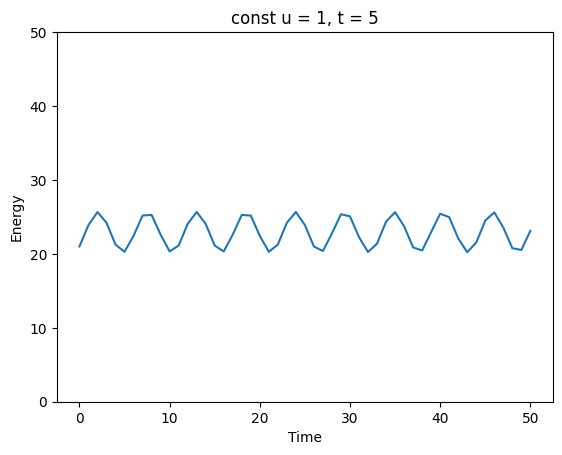

In [ ]:
# DEFINE PARAMETERS
num_sites = 2
t = 5
u = 1
v = 10
time = 20
steps = 50
initial_condition = Statevector.from_label("1100")

# MAIN CALL
result2 = HubbardModel(2, t, u, v, time, steps, initial_condition)
print_results(result2, "const u = 1, t = 5")

<ipython-input-189-00612115a3a9>:68: DeprecationWarning: Setting `order` to an odd number in the constructor of SuzukiTrotter is deprecated as of qiskit-terra 0.20.0. It will be removed no earlier than 3 months after the release date. Suzuki product formulae are symmetric and therefore only defined for even orders.
  suz = SuzukiTrotter(order=3)


state: 0000 => 0.0
state: 0001 => 0.0
state: 0010 => 0.0
state: 0011 => 0.1
state: 0100 => 0.0
state: 0101 => 0.0
state: 0110 => 0.0
state: 0111 => 0.0
state: 1000 => 0.0
state: 1001 => 0.0
state: 1010 => 0.0
state: 1011 => 0.0
state: 1100 => 0.8
state: 1101 => 0.0
state: 1110 => 0.0
state: 1111 => 0.0
21.0


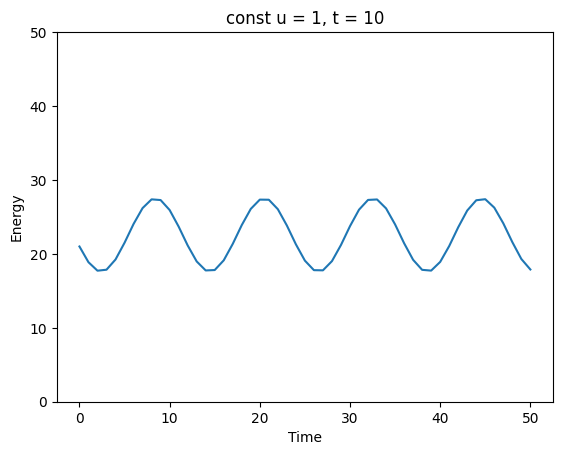

In [ ]:
# DEFINE PARAMETERS
num_sites = 2
t = 10
u = 1
v = 10
time = 20
steps = 50
initial_condition = Statevector.from_label("1100")

# MAIN CALL
result2 = HubbardModel(2, t, u, v, time, steps, initial_condition)
print_results(result2, "const u = 1, t = 10")